In [2]:
def convertResult(img):
    '''Because of your images which were loaded by opencv, 
    in order to display the correct output with matplotlib, 
    you need to reduce the range of your floating point image from [0,255] to [0,1] 
    and converting the image from BGR to RGB:'''
    img = np.array(img,dtype=float)/float(255)
    img = img[:,:,::-1]
    return img

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import stitch
import utils
import features

In [1]:
# Load the images
img1 = cv2.imread(r'C:\Users\pgsar\Desktop\CV\2023_1.jpg')
img2 = cv2.imread(r"C:\Users\pgsar\Desktop\CV\2023_2.jpg")
img3 = cv2.imread(r"C:\Users\pgsar\Desktop\CV\2023_3.jpg")
img4 = cv2.imread(r"C:\Users\pgsar\Desktop\CV\2023_4.jpg")
img5 = cv2.imread(r"C:\Users\pgsar\Desktop\CV\2023_5.jpg")

width = 640
height = 480


# resized all images
resized1 = cv2.resize(img1, (width, height))
resized2 = cv2.resize(img2, (width, height))
resized3= cv2.resize(img3, (width, height))
resized4 = cv2.resize(img4, (width, height))
resized5 = cv2.resize(img5, (width, height))


# Convert the images to grayscale
gray1 = cv2.cvtColor(resized1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(resized2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(resized3, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(resized4, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(resized5, cv2.COLOR_BGR2GRAY)

# Detect the keypoints and descriptors of each image
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)
kp3, des3 = orb.detectAndCompute(gray3, None)
kp4, des4 = orb.detectAndCompute(gray4, None)
kp5, des5 = orb.detectAndCompute(gray5, None)

# Match the keypoints of the images
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches1 = bf.match(des1, des2)
matches2 = bf.match(des2, des3)
matches3 = bf.match(des3, des4)
matches4 = bf.match(des4, des5)

# Find the homography matrix
src_pts1 = np.float32([kp1[m.queryIdx].pt for m in matches1]).reshape(-1, 1, 2)
dst_pts1 = np.float32([kp2[m.trainIdx].pt for m in matches1]).reshape(-1, 1, 2)
H1, _ = cv2.findHomography(src_pts1, dst_pts1, cv2.RANSAC, 5.0)

src_pts2 = np.float32([kp2[m.queryIdx].pt for m in matches2]).reshape(-1, 1, 2)
dst_pts2 = np.float32([kp3[m.trainIdx].pt for m in matches2]).reshape(-1, 1, 2)
H2, _ = cv2.findHomography(src_pts2, dst_pts2, cv2.RANSAC, 5.0)

src_pts3 = np.float32([kp3[m.queryIdx].pt for m in matches3]).reshape(-1, 1, 2)
dst_pts3 = np.float32([kp4[m.trainIdx].pt for m in matches3]).reshape(-1, 1, 2)
H3, _ = cv2.findHomography(src_pts3, dst_pts3, cv2.RANSAC, 5.0)

src_pts4 = np.float32([kp4[m.queryIdx].pt for m in matches4]).reshape(-1, 1, 2)
dst_pts4 = np.float32([kp5[m.trainIdx].pt for m in matches4]).reshape(-1, 1, 2)
H4, _ = cv2.findHomography(src_pts4, dst_pts4, cv2.RANSAC, 5.0)

# Warp the images
height, width, channels = img1.shape
panorama1 = cv2.warpPerspective(img1, H1, (width*2, height))
panorama2 = cv2.warpPerspective(img2, H1.dot(H2), (width*3, height))
panorama3 = cv2.warpPerspective(img3, H1.dot(H2).dot(H3), (width*4, height))
panorama4 = cv2.warpPerspective(img4, H1.dot(H2).dot(H3).dot(H4), (width*5, height))
panorama5 = cv2.warpPerspective(img5, H1.dot(H2).dot(H3).dot(H4), (width*6, height))

# Merge the warped images together
merge1 = cv2.addWeighted(panorama1, 1, panorama2, 1, 0)
merge2 = cv2.addWeighted(merge1, 1, panorama3, 1, 0)
merge3 = cv2.addWeighted(merge2, 1, panorama4, 1, 0)
panorama = cv2.addWeighted(merge3, 1, panorama5, 1, 0)

# Display the panorama
cv2.imshow('Panorama', panorama)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [2]:
img1 = cv2.imread(r"C:\Users\pgsar\Desktop\LC08_L2SP_143048_20230301_20230315_02_T1_SR_B5 (1).TIF")
img2 = cv2.imread(r"C:\Users\pgsar\Desktop\LC08_L2SP_143049_20230301_20230315_02_T1_SR_B5.TIF")
# img3 = cv2.imread(r"C:\Users\pgsar\Desktop\CV\2023_3.jpg")
# img4 = cv2.imread(r"C:\Users\pgsar\Desktop\CV\2023_4.jpg")
# img5 = cv2.imread(r"C:\Users\pgsar\Desktop\CV\2023_5.jpg")
#
# # Create a list of the images
# images = [img1, img2, img3, img4, img5]

# Define the maximum size of the output image
max_size = (1000, 1000)

# Create an empty array for the final stitched image
stitched_image = np.zeros((max_size[1], max_size[0], 3), dtype=np.uint8)

# Define the stitching algorithm (in this case, using OpenCV's built-in stitcher)
stitcher = cv2.createStitcher()

# Stitch the images together
status, stitched = stitcher.stitch(images)

# Check if stitching was successful
if status == cv2.STITCHER_OK:
    # Resize the stitched image to fit within the maximum size
    height, width, channels = stitched.shape
    if height > max_size[1] or width > max_size[0]:
        scale = min(max_size[0] / width, max_size[1] / height)
        stitched = cv2.resize(stitched, (int(scale * width), int(scale * height)))

    # Copy the stitched image into the final array
    stitched_image[:stitched.shape[0], :stitched.shape[1], :] = stitched

# Display the final stitched image
cv2.imshow("Stitched Image", stitched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: module 'cv2' has no attribute 'createStitcher'

In [3]:
#load images
list_images=utils.loadImages('data/river_2023',resize=0)

In [34]:
#extract keypoints and descriptors using sift
#draw keypoints
# Check the size of both images
print("Image 1 size:", list_images[0].shape)
print("Image 2 size:", list_images[1].shape)

# Determine which image is the larger one and resize it to match the smaller image
if list_images[0].shape[0] > list_images[1].shape[0]:
    smaller_image = list_images[1]
    larger_image = list_images[0]
else:
    smaller_image = list_images[0]
    larger_image = list_images[1]

resized_image = cv2.resize(larger_image, (smaller_image.shape[1], smaller_image.shape[0]), interpolation=cv2.INTER_LINEAR)

# Verify that both images have the same size
# print("Image 1 size:", smaller_image.shape)
# print("Image 2 size:", resized_image.shape)
k0,f0=features.findAndDescribeFeatures(smaller_image,opt='SIFT')
k1,f1=features.findAndDescribeFeatures(resized_image,opt='SIFT')

Image 1 size: (1046, 1024, 3)
Image 2 size: (1044, 1024, 3)


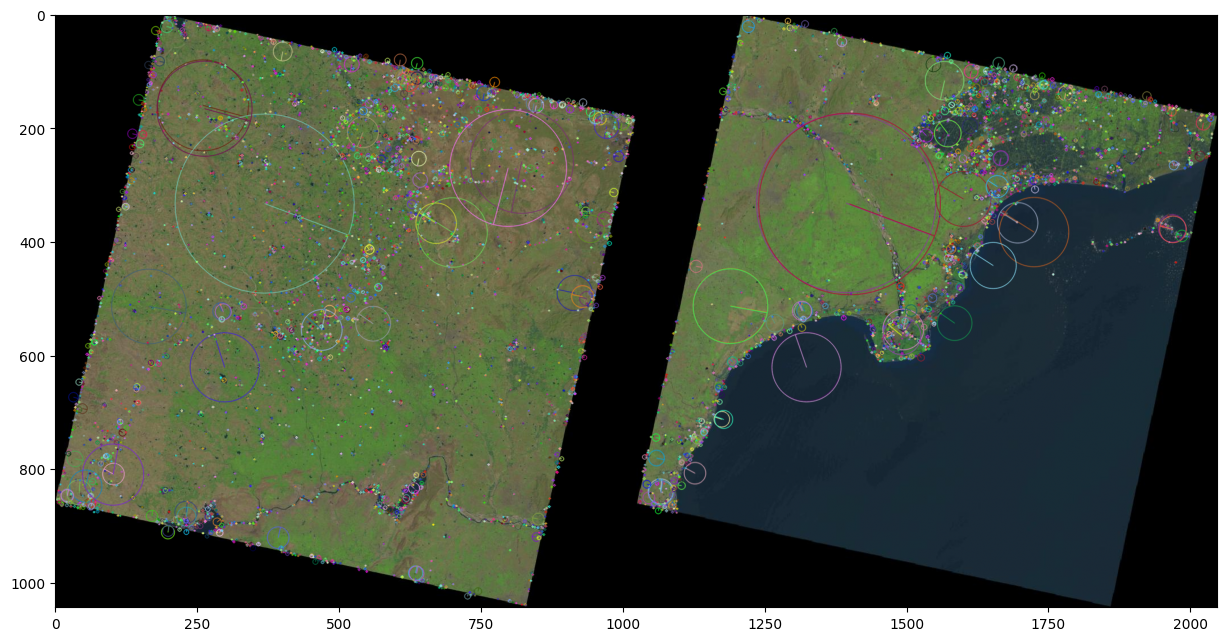

In [22]:

img0_kp=features.drawKeypoints(smaller_image,k0)
img1_kp=features.drawKeypoints(resized_image,k1)

plt_img = np.concatenate((img0_kp, img1_kp), axis=1)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(plt_img))

In [43]:
#matching features using BruteForce 
mat=features.matchFeatures(f0,f1,ratio=0.8,opt='BF')
print(mat)

[< cv2.DMatch 0000019A000C4770>, < cv2.DMatch 0000019A000C43F0>, < cv2.DMatch 0000019A000C4070>, < cv2.DMatch 0000019A000C4C70>, < cv2.DMatch 0000019A000C4D30>, < cv2.DMatch 0000019A000C4DB0>, < cv2.DMatch 0000019A000C4EB0>, < cv2.DMatch 0000019A000C6AD0>, < cv2.DMatch 0000019A000C60F0>, < cv2.DMatch 0000019A000C66D0>, < cv2.DMatch 0000019A000C6F30>, < cv2.DMatch 0000019A000DC470>, < cv2.DMatch 0000019A000DC890>, < cv2.DMatch 0000019A00026470>, < cv2.DMatch 0000019A000B79B0>, < cv2.DMatch 0000019A000B7A30>, < cv2.DMatch 0000019A000B7E70>, < cv2.DMatch 0000019A03FA71B0>, < cv2.DMatch 0000019A03FA73B0>, < cv2.DMatch 0000019A03FA73F0>, < cv2.DMatch 0000019A03FA7530>, < cv2.DMatch 0000019A03FA7830>, < cv2.DMatch 0000019A03FA7870>, < cv2.DMatch 0000019A03FA7A50>, < cv2.DMatch 0000019A03FA7E30>, < cv2.DMatch 0000019A03FCA110>, < cv2.DMatch 0000019A03FCA250>, < cv2.DMatch 0000019A03FCA3D0>, < cv2.DMatch 0000019A03FCACB0>, < cv2.DMatch 0000019A03FCD5F0>, < cv2.DMatch 0000019A03FCD8D0>, < cv2.D

In [44]:
#Computing Homography matrix and mask
H,matMask=features.generateHomography(smaller_image,resized_image)
print(matMask)

[0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]


In [46]:
#draw matches
print(resized_image.shape)
print(smaller_image.shape)
img=features.drawMatches(smaller_image,k0,resized_image,k1,mat,matMask)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(img))

(1044, 1024, 3)
(1044, 1024, 3)


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\draw.cpp:228: error: (-201:Incorrect size of input array) matchesMask must have the same size as matches1to2 in function 'cv::drawMatches'


In [38]:
#wrap 2 image
#choose list_images[0] as desination
pano,non_blend,left_side,right_side=stitch.warpTwoImages(smaller_image,resized_image,True)

Exception: Please try again with another image set!

In [39]:
#display the leftside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(left_side))

NameError: name 'left_side' is not defined

<Figure size 1500x1500 with 0 Axes>

In [40]:
#display the rightside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(right_side))

NameError: name 'right_side' is not defined

<Figure size 1500x1500 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


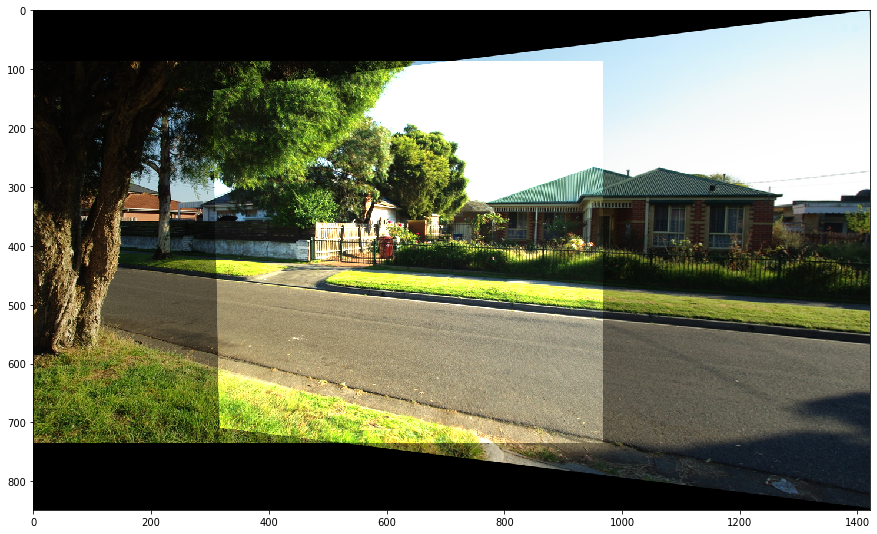

In [7]:
#display pano without cropping and blending
plt.figure(figsize=(15,15))
plt.imshow(convertResult(non_blend))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


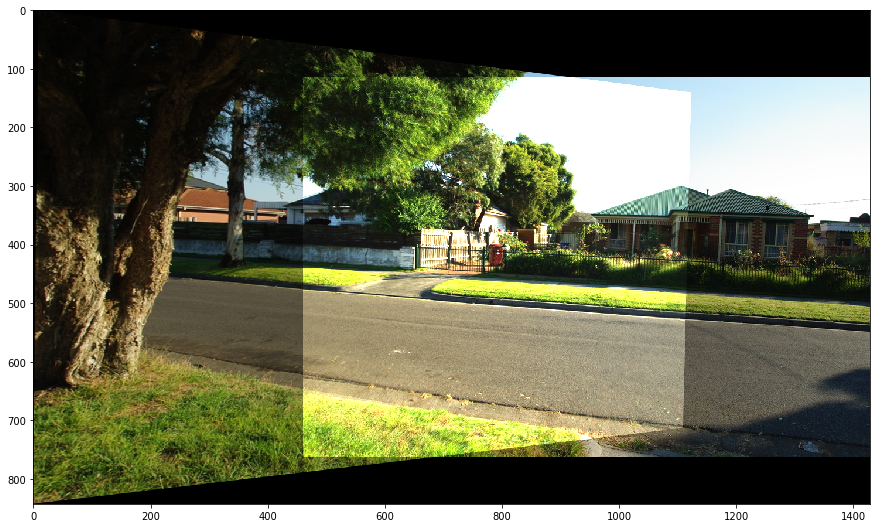

In [8]:
#if you choose list_images[1] as desination, the output look like this
_,non_blend2,_,_=stitch.warpTwoImages(list_images[0],list_images[1],True)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(non_blend2))

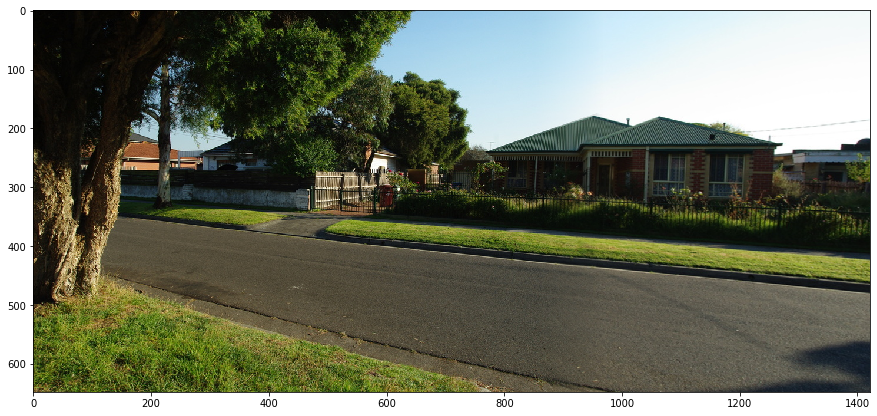

In [9]:
#pano after cropping and blending
plt.figure(figsize=(15,15))
plt.imshow(convertResult(pano))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


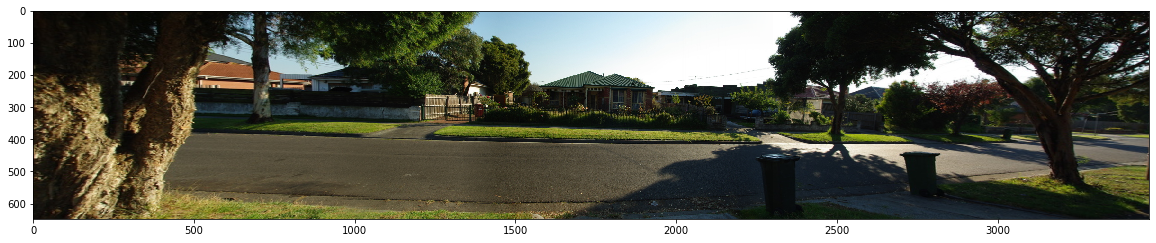

In [10]:
#multi stitching
panorama=stitch.multiStitching(list_images)
plt.figure(figsize=(20,20))
plt.imshow(convertResult(panorama))